In [76]:
# -*- coding: utf-8 -*-
%matplotlib inline
import dataiku
import pandas as pd, numpy as np
from dataiku import pandasutils as pdu
import matplotlib.pyplot as plt

In [77]:
# Read recipe inputs
transactions_known_scored = dataiku.Dataset("transactions_known_scored").get_dataframe(limit=1000)

In [78]:
list_var = ['authorized_flag','proba_1']
transactions_known_scored = transactions_known_scored[list_var]
transactions_known_scored['decile'] = pd.cut(x=transactions_known_scored.proba_1, 
                                             bins=10, precision=1, right=False)
transactions_known_scored.decile = transactions_known_scored.decile.astype(str) 

In [79]:
col_names = {'authorized_flag':'sum_true', 'proba_1':'count_pred'}
df_by_deciles = transactions_known_scored.groupby(by='decile').agg({'authorized_flag':'sum', 
                                                                    'proba_1':'count'}).rename(columns=col_names)

In [80]:
df_by_deciles['validation_ratio'] = df_by_deciles.sum_true/df_by_deciles.count_pred
df_by_deciles.sort_index(ascending=True, inplace=True)

In [82]:
df_by_deciles.head()

,sum_true,count_pred,validation_ratio
decile,,,
"[0.03, 0.1)",1,7,0.142857
"[0.1, 0.2)",0,6,0.000000
"[0.2, 0.3)",5,12,0.416667
"[0.3, 0.4)",98,137,0.715328
"[0.4, 0.5)",294,337,0.872404


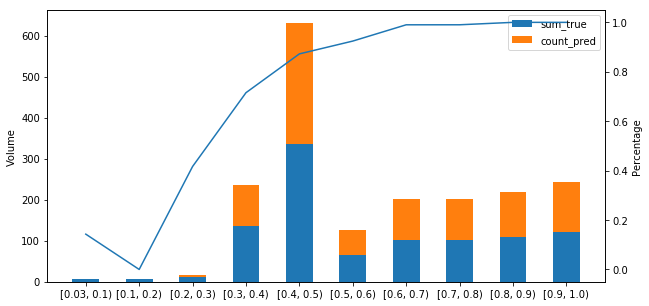

In [85]:
labels = list(df_by_deciles.index)
sum_true = list(df_by_deciles.sum_true)
count_pred = list(df_by_deciles.count_pred)
validation_ratio = list(df_by_deciles.validation_ratio)
width = 0.5 # the width of the bars

fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.bar(labels, count_pred, width, label='sum_true')
ax1.bar(labels, sum_true, width, bottom=count_pred, label='count_pred')

ax1.set_ylabel('Volume')
ax1.legend()


ax2 = ax1.twinx()
ax2.plot(labels, validation_ratio)
ax2.set_ylabel('Percentage')

#plt.title()
plt.show()

In [0]:
# Write recipe outputs
data_viz = dataiku.Folder("ofSVU3Pe")
data_viz_info = data_viz.get_info()